## GROSSING MOVIES ANALYSIS

### DATA CONTEXT AND UNDERSTANDING

- This dataset contains information about the top 1000 highest grossing holywood films.
- Main Attributes:
    - Title: Title of Movie
    - Movie Info: Summary of the Story 
    - Distributor
    - Release Date
    - Sale: Domestic Sales, International Sales, World Sales
    - Genre: Genre of movie (1 movie may have many genres)
    - Movie Runtime
    - License

===========================================================

### DATA INSPECTION

- **Import Packages and Dataset**

In [1]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ast
# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

In [3]:
# See all csv files in the folder 🐯
import os
files = [f for f in os.listdir() if f.endswith(".csv")]
print(files)

[]


In [4]:
data= pd.read_csv('../input/top-1000-highest-grossing-movies/Highest Holywood Grossing Movies.csv')
data.head(3)

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


- **Basic Data Cleaning**

In [6]:
# We drop any duplicate records
data.drop_duplicates(inplace=True)
# We observe that the column 'Unnamed: 0' is unnecessary, hence we drop the column 
data.drop('Unnamed: 0', axis=1,inplace=True)
# I want to replace values of Movie Runtime to a numeric values of hours
runtime= data['Movie Runtime'].str.split(expand=True).iloc[:,[0,2]]
runtime[2].fillna(0,inplace=True)
runtime= runtime.astype('int64')
runtime['hour']= runtime[0]+runtime[2]/60
data['Movie Runtime']= runtime['hour']
# We should change the type of Release Date into Datetime 🐩
data['Release Date']= pd.to_datetime(data['Release Date'])
# I want to replace some of column names
data.rename(columns={'Domestic Sales (in $)':'Domestic Sales','International Sales (in $)':'International Sales',
                     'World Sales (in $)':'World Sales'}, inplace=True)
# I want to change the unit of 'Domestic Sales (in $)', 'International Sales (in $)','World Sales (in $)'
# into unit of 1 million dollars
data[['Domestic Sales','International Sales','World Sales']]= data[['Domestic Sales',
                                            'International Sales','World Sales']].apply(lambda x: x/(10**6))
# The Genre column is appeared as a string of list, we have to change this
data['Genre']= data['Genre'].apply(lambda x: ast.literal_eval(x))
# New dataset is :
data.head(3)

,Title,Movie Info,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936.662225,1132.859475,2069.521700,"[Action, Adventure, Sci-Fi]",2.300000,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858.373000,1939.128328,2797.501328,"[Action, Adventure, Drama, Sci-Fi]",3.016667,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760.507625,2086.738578,2847.246203,"[Action, Adventure, Fantasy, Sci-Fi]",2.700000,PG-13


In [7]:
# just a little curiousity, why for many records, sum of Domestic and International
# are unequal to World sale (roughly 25% of data rows)
mask= data['Domestic Sales']+ data['International Sales'] == data['World Sales']
mask.sum()/data.shape[0]

0.7505446623093682

- **Inspection of whole dataset**

In [8]:
# Data Types and Missing Values
data_info= pd.DataFrame(data.dtypes)
data_info['num_NA']= data.isna().sum()
data_info['percentage_NA']= data.isna().mean()
data_info.columns= ['Type', 'num_NA', 'percentage_NA']
data_info

,Type,num_NA,percentage_NA
Title,object,0,0.000000
Movie Info,object,0,0.000000
Distributor,object,0,0.000000
Release Date,datetime64[ns],118,0.128540
Domestic Sales,float64,0,0.000000
International Sales,float64,0,0.000000
World Sales,float64,0,0.000000
Genre,object,0,0.000000
Movie Runtime,float64,0,0.000000
License,object,174,0.189542


- Missing values appear in only 2 attributes (Release Date,License) with the percentages of missing are under 20%. We can inspect the underlying 'mechanism' of these missed values

In [9]:
mask1= data['Release Date'].isna()
mask2= data['License'].isna()
data[mask1 & mask2].shape[0]/data.shape[0]

0.12854030501089325

- We can observe that all the record with missing license will have no recorded released date. 

In [10]:
# Shape of data
data.shape

(918, 10)

In [11]:
# Columns of data
data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date', 'Domestic Sales',
       'International Sales', 'World Sales', 'Genre', 'Movie Runtime',
       'License'],
      dtype='object')

In [12]:
num_col= ['Domestic Sales', 'International Sales', 'World Sales','Movie Runtime']
cat_col= ['Title','Movie Info', 'Distributor','License','Genre']
date_col='Release Date'

- **Data Formats**
     - Numeric variables (Discete): 'Domestic Sales', 'International Sales','World Sales'
     - Numeric variables (Continuous): 'Movie Runtime'
     - Categorical variables (Nominal):  'Title', 'Movie Info', 'Distributor', 'Genre', 'License'
     - Categorical variables (Datetime): 'Release Date'

- **Inspection of Numerical Variables**

In [13]:
data[num_col].describe()

,Domestic Sales,International Sales,World Sales,Movie Runtime
count,918.000000,918.000000,918.000000,918.000000
mean,167.746918,230.143436,396.866826,1.942847
std,104.036045,217.601104,308.262916,0.347929
min,80.360843,0.000260,81.600000,1.266667
25%,101.607072,88.456200,200.556355,1.666667
50%,132.135096,163.881928,301.941607,1.916667
75%,191.390486,288.557651,475.071823,2.166667
max,936.662225,2086.738578,2847.246203,3.350000


- **Inspection of Categorical Variables**

In [14]:
# Number of different Genre
Genre= []
for i in range(data.shape[0]):
    Genre.extend(data.loc[i,'Genre'])
Genre[:7]
pd.Series(Genre).unique()

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Fantasy', 'Romance',
       'Animation', 'Comedy', 'Family', 'Musical', 'Crime', 'Thriller',
       'War', 'Mystery', 'Biography', 'Horror', 'Sport', 'Music',
       'History', 'Western', 'Documentary'], dtype=object)

- There are, in total 21 different types of movie's genre. 

In [15]:
# We inspect unique values of categorical data
unique_data= pd.DataFrame({'columns':cat_col[:-1]})
unique_data['is_unique']= unique_data['columns'].apply(lambda x: data[x].is_unique)
unique_data['num_unique_val']= unique_data['columns'].apply(lambda x: data[x].nunique())
unique_data['unique_val']=unique_data['columns'].apply(lambda x: data[x].unique())
unique_data

,columns,is_unique,num_unique_val,unique_val
0,Title,True,918,[Star Wars: Episode VII - The Force Awakens (2...
1,Movie Info,True,918,"[As a new threat to the galaxy rises, Rey, a d..."
2,Distributor,False,34,"[Walt Disney Studios Motion Pictures, Twentiet..."
3,License,False,4,"[PG-13, nan, PG, G, R]"


- Title can be used as a key to uniquely identify a row 

=============================================================================

### BASIC EDA AND DATA PRE-PROCESSING

- **Correlation Matrix - Numerical Variables**

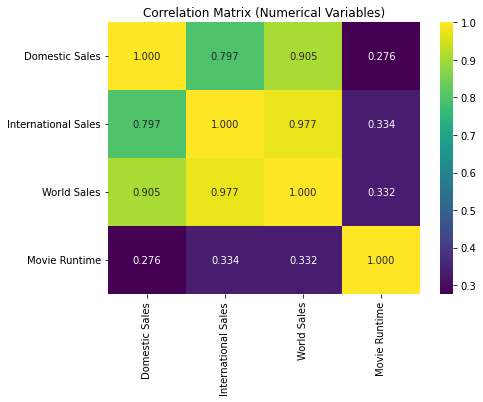

In [16]:
fig,ax= plt.subplots(figsize=(7,5))
sns.heatmap(data[num_col].corr(), annot=True, fmt='0.3f', ax=ax, cmap='viridis')
ax.set_title('Correlation Matrix (Numerical Variables)');

- Clearly, the Domestic and International sales have high positive correlation with world sale, over 0.9 (as they sum up to world sale)
- Movies with high sale domestically tend to have high sale in international market (corr is roughly 0.8)
- There is no clear linear correlation btw Movie runtime and Sales

- **Histogram- Numerical Variables**

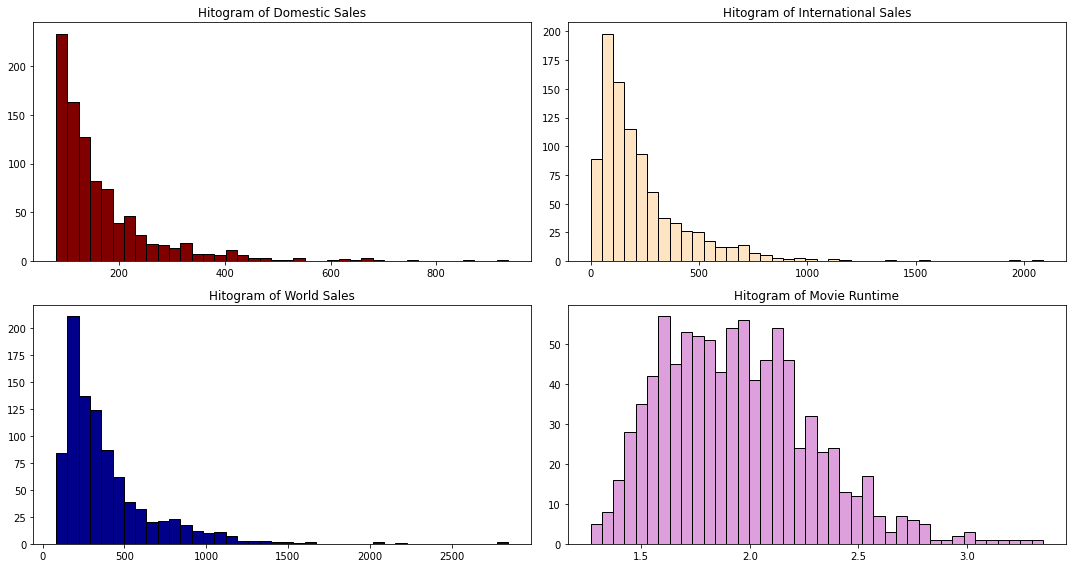

In [17]:
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(15,8))
ax_index=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
color= ['maroon','bisque','darkblue','plum']
for i in range(4):
    ax_index[i].hist(data[num_col[i]],bins=40,color=color[i], edgecolor='black')
    ax_index[i].set_title(f'Hitogram of {num_col[i]}')
fig.tight_layout();

- We can see that, except the Movie runtime which has distribution of bell-shaped one, all the Sale's distributions are obviously right-skewed, hence, we may expect there are some outliners (movies with extremely high amount of sales. 

- **Number of Movies and Sale by each Distributor**

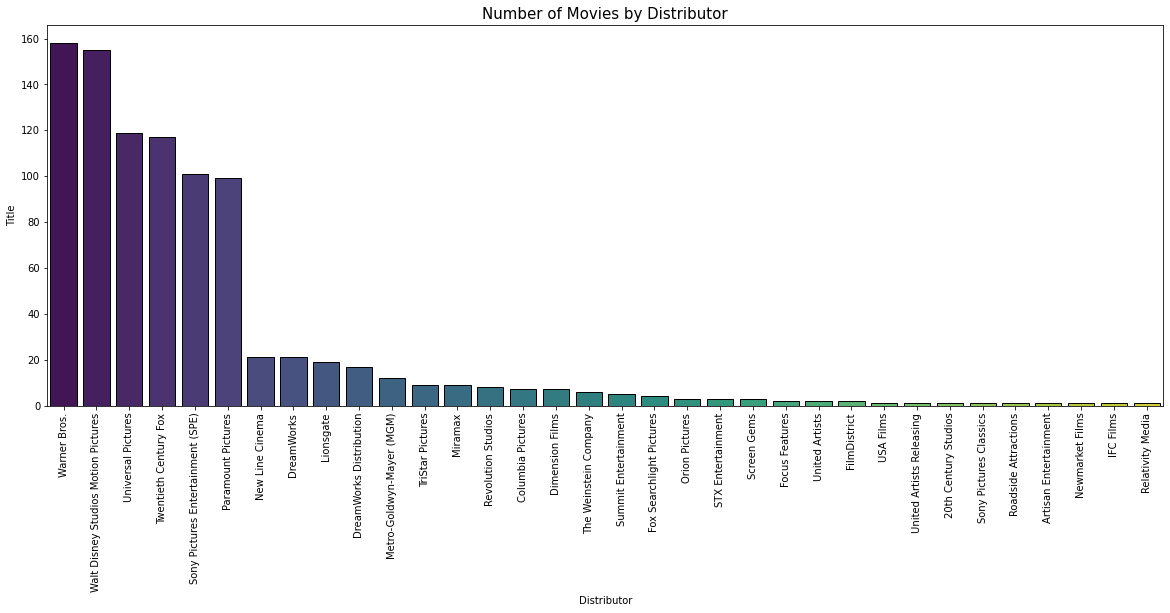

In [18]:
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(x='Distributor',y='Title', palette='viridis', edgecolor='black',
            data= data.groupby('Distributor', as_index=False)['Title'].count().sort_values('Title',ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Number of Movies by Distributor', fontsize=15);

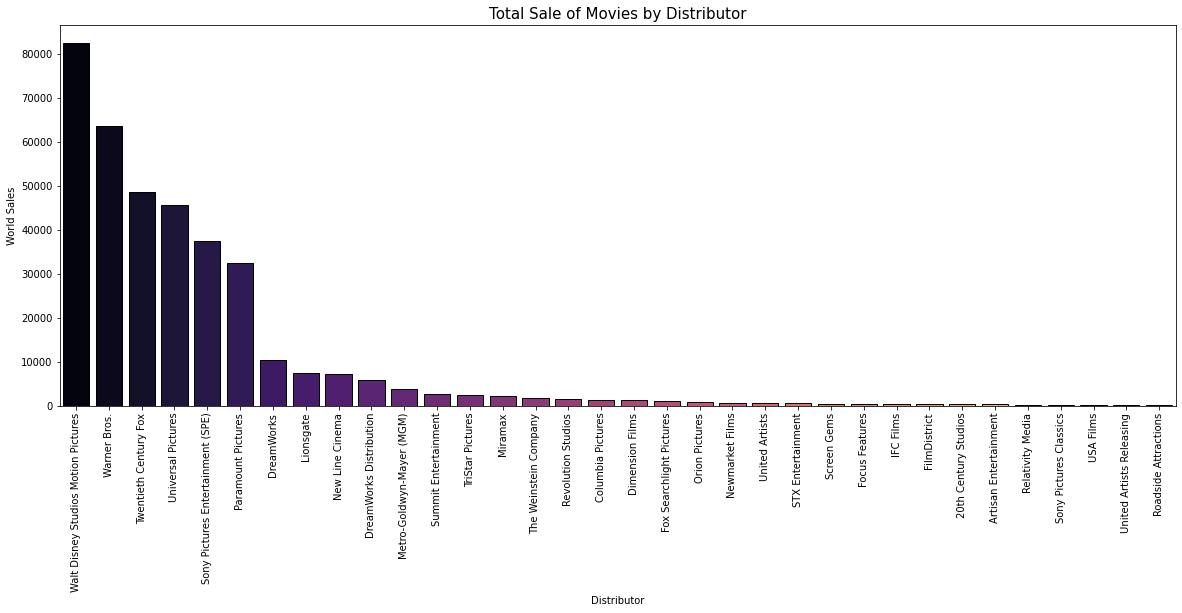

In [19]:
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(x='Distributor',y='World Sales', palette='magma', edgecolor='black',
            data= data.groupby('Distributor', as_index=False)['World Sales'].sum().sort_values('World Sales',ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Total Sale of Movies by Distributor', fontsize=15);

- From these bar chart, we can imply that top 6 Distributor of Movies are 'Walt Disney Studios Motion Pictures',
 'Warner Bros.',
 'Twentieth Century Fox',
 'Universal Pictures',
 'Sony Pictures Entertainment (SPE)',
 'Paramount Pictures'.
- The Walt Disney distributor dominates the chart in term of total Sales worldwide. 

- **Number of Movies and Sale by each Genre**

In [20]:
def subset_genre(g):
    mask=data['Genre'].apply(lambda x: g in x)
    return data[mask]

In [21]:
genre_data= pd.DataFrame({'genre':pd.Series(Genre).unique()})
genre_data['num_movie']= genre_data['genre'].apply(lambda g: subset_genre(g).shape[0])
genre_data['average_sale']= genre_data['genre'].apply(lambda g: subset_genre(g)['World Sales'].mean())
genre_data['total_sale']= genre_data['genre'].apply(lambda g: subset_genre(g)['World Sales'].sum())
genre_data

,genre,num_movie,average_sale,total_sale
0,Action,396,475.666143,188363.792761
1,Adventure,432,531.181019,229470.200349
2,Sci-Fi,228,537.513491,122553.076019
3,Drama,300,329.879297,98963.789161
4,Fantasy,227,491.882627,111657.356323
5,Romance,142,328.356154,46626.573801
6,Animation,140,476.451291,66703.180691
7,Comedy,399,328.343352,131008.997340
8,Family,227,433.959077,98508.710535
9,Musical,51,449.595166,22929.353459


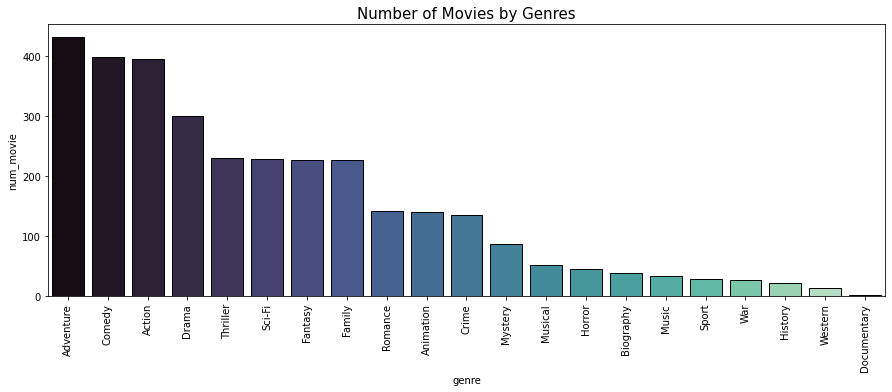

In [22]:
fig,ax= plt.subplots(figsize=(15,5))
sns.barplot(x='genre', y='num_movie', data=genre_data.sort_values('num_movie', ascending=False)
            , palette='mako', edgecolor='black', ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Number of Movies by Genres', fontsize=15);

- Top 4 Genre by amount of movies are Adventure, Comedy, Action and Drama

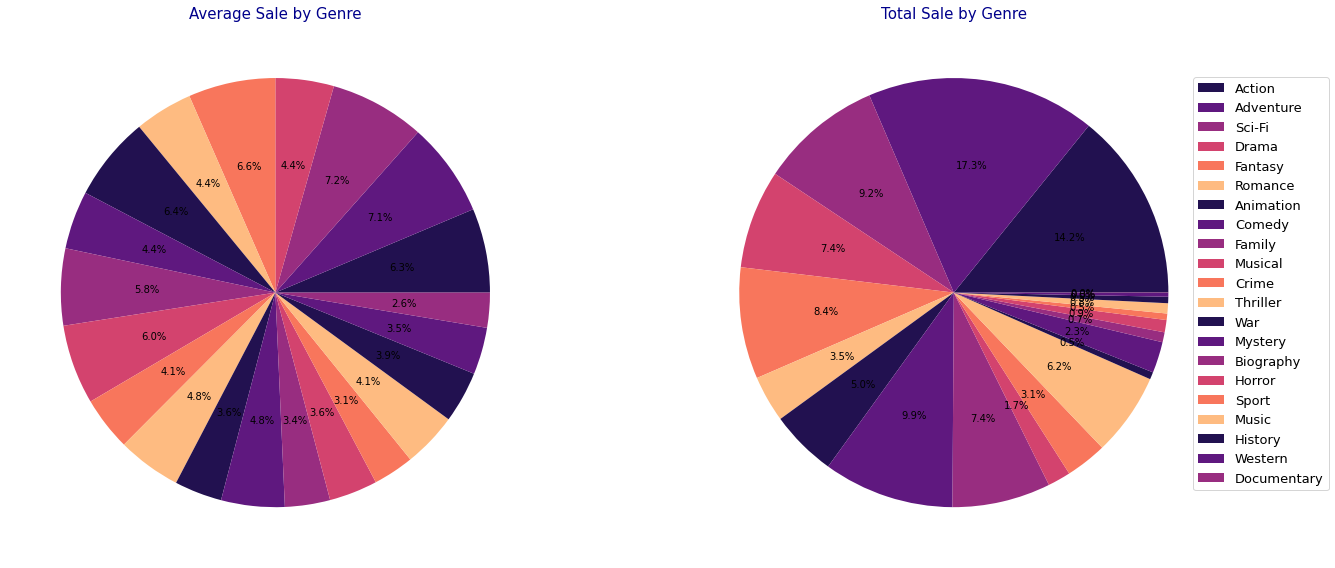

In [23]:
fig, ax= plt.subplots(ncols=2, figsize=(20,8))
color = sns.color_palette('magma')
ax[0].pie(x=genre_data['average_sale'], colors=color,autopct='%1.1f%%')
ax[1].pie(x=genre_data['total_sale'], colors=color,autopct='%1.1f%%')
ax[0].set_title('Average Sale by Genre', color='darkblue', fontsize=15)
ax[1].set_title('Total Sale by Genre',color='darkblue', fontsize=15)
fig.legend(genre_data['genre'],loc='right', fontsize=13)
fig.tight_layout();

- Average sale per movie seem to spare uniformly across all genres -> there is no specific genre that significantly generates higher sale
- Top 2 Genres by total sale are Action and Adventure (14%,17%) due to large amount of movies. 

- **Genres that usually go together - Apriori Learning**

In [24]:
!pip install efficient_apriori
from efficient_apriori import apriori

In [25]:
genre_group= []
for i in range(data.shape[0]):
    genre_group.append(tuple(data.loc[i,'Genre']))

In [26]:
itemsets, rules = apriori(genre_group, min_support=0.15, min_confidence=0)

In [27]:
# Cluster of Genres
genre_cluster= pd.DataFrame({'Group of Genres':list(itemsets[2]),
                            'Frequency':list(itemsets[2].values())})
genre_cluster.append(pd.DataFrame({'Group of Genres':list(itemsets[3]),
                            'Frequency':list(itemsets[3].values())}))

,Group of Genres,Frequency
0,"(Action, Adventure)",248
1,"(Action, Sci-Fi)",180
2,"(Action, Thriller)",155
3,"(Adventure, Comedy)",191
4,"(Adventure, Family)",188
5,"(Adventure, Fantasy)",186
6,"(Adventure, Sci-Fi)",176
7,"(Comedy, Family)",180
8,"(Family, Fantasy)",139
0,"(Action, Adventure, Sci-Fi)",143


In [28]:
# Association rules of the Genres
# For ex, Movie that is categorized as Adventure usually listed on Action genre
rules

[{Adventure} -> {Action},
 {Action} -> {Adventure},
 {Sci-Fi} -> {Action},
 {Action} -> {Sci-Fi},
 {Thriller} -> {Action},
 {Action} -> {Thriller},
 {Comedy} -> {Adventure},
 {Adventure} -> {Comedy},
 {Family} -> {Adventure},
 {Adventure} -> {Family},
 {Fantasy} -> {Adventure},
 {Adventure} -> {Fantasy},
 {Sci-Fi} -> {Adventure},
 {Adventure} -> {Sci-Fi},
 {Family} -> {Comedy},
 {Comedy} -> {Family},
 {Fantasy} -> {Family},
 {Family} -> {Fantasy},
 {Adventure, Sci-Fi} -> {Action},
 {Action, Sci-Fi} -> {Adventure},
 {Action, Adventure} -> {Sci-Fi},
 {Sci-Fi} -> {Action, Adventure},
 {Adventure} -> {Action, Sci-Fi},
 {Action} -> {Adventure, Sci-Fi},
 {Comedy, Family} -> {Adventure},
 {Adventure, Family} -> {Comedy},
 {Adventure, Comedy} -> {Family},
 {Family} -> {Adventure, Comedy},
 {Comedy} -> {Adventure, Family},
 {Adventure} -> {Comedy, Family}]

- **Number of Movies and Sale by each year**

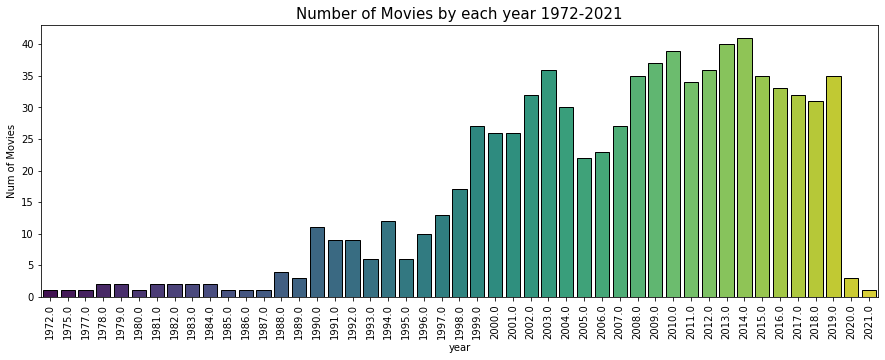

In [29]:
year_data=data.copy()
year_data['year']=year_data['Release Date'].dt.year
year_data.dropna(subset=['year'],inplace=True)
fig,ax= plt.subplots(figsize=(15,5))
sns.barplot(x='year',y='Title',data=year_data.groupby('year',as_index=False)['Title'].count(),
           palette='viridis',edgecolor='black',ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Num of Movies')
ax.set_title('Number of Movies by each year 1972-2021', fontsize=15);

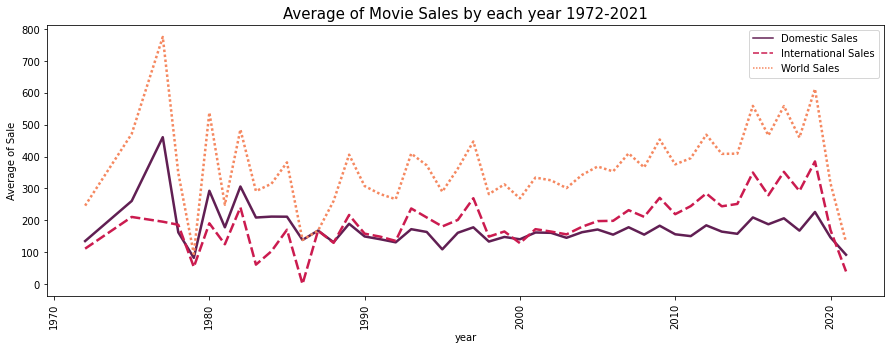

In [30]:
fig,ax= plt.subplots(figsize=(15,5))
sns.lineplot(data=year_data.groupby('year')[num_col[:-1]].mean(),
           palette='rocket',lw=2.5,ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Average of Sale')
ax.set_title('Average of Movie Sales by each year 1972-2021', fontsize=15);

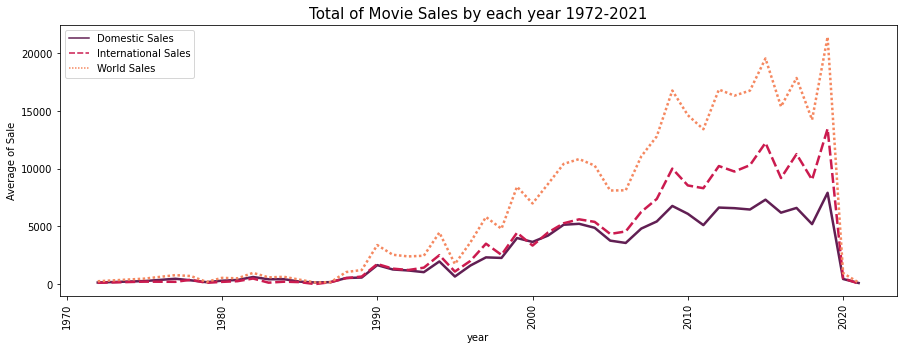

In [31]:
fig,ax= plt.subplots(figsize=(15,5))
sns.lineplot(data=year_data.groupby('year')[num_col[:-1]].sum(),
           palette='rocket',lw=2.5,ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Average of Sale')
ax.set_title('Total of Movie Sales by each year 1972-2021', fontsize=15);

- In 2019-2020, the Sales decreased substantially, as an consequence of Covid-19

- **Few Inspection for License**

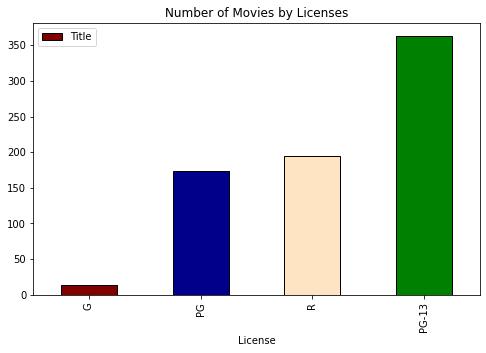

In [32]:
color=['maroon','darkblue','bisque','green']
data.dropna(subset=['License']).groupby('License',as_index=False)['Title'].count().sort_values('Title').plot.bar(
    x='License', y='Title',color=color, edgecolor='black', figsize=(8,5),
    title='Number of Movies by Licenses');

- Most of Movies have license PG-13 (Parents Strongly Cautioned, Some Material May Be Inappropriate for Children Under 13)